 Lesson 1 - Statistics Review - Numerical and Descriptive Measures

In [1]:
import pandas as pd
import numpy as np
import statistics 
from scipy import stats 

In [3]:
data_path = 'https://raw.githubusercontent.com/erdiolmezogullari/ml-ab-testing/master/ab_data.csv'
df = pd.read_csv(data_path)
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


# Lesson 1 - Numerical Descriptive Measures

<p>
<dt>Central Tendency</dt>
<dd>The <b>central tendency</b> is the extent to which all the data values group around a typical or central value.</dd>
</p>
<p>
<dt>Variation</dt>
<dd>The <b>variation</b> is the amount of dispersion, or scattering, of values away from a central value.</dd>
</p>
<p>
<dt>Shape</dt>
<dd>The <b>shape</b> is the pattern of the distribution of values from the lowest value to the highest
value.</dd>    
</p>

Using the Python Statistics package found here:
https://docs.python.org/3/library/statistics.html

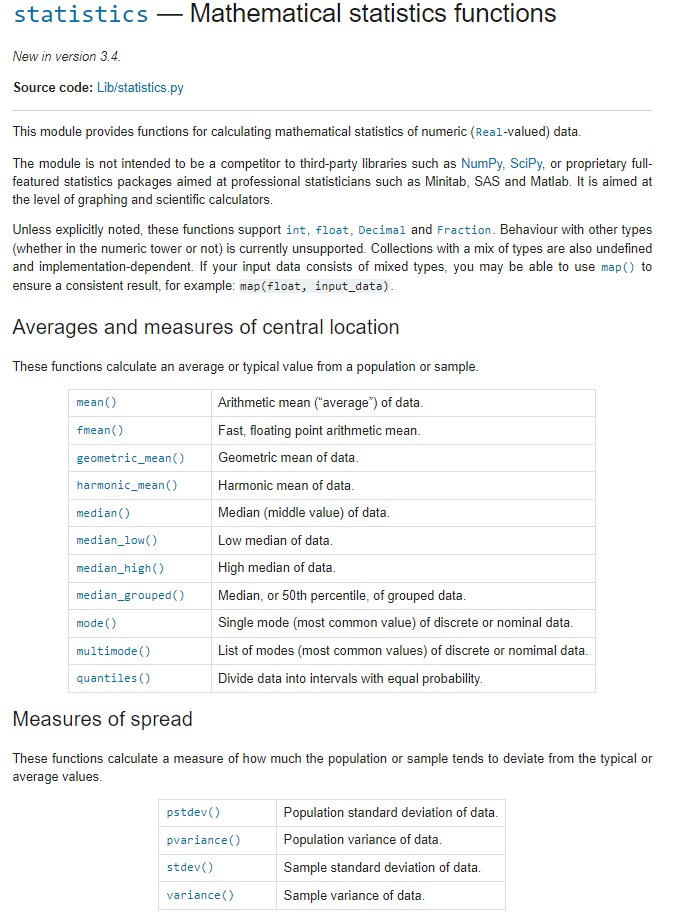

## Measures of Central Tendency

### Mean, Median, and Mode
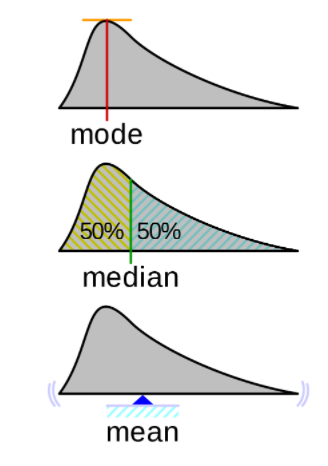

Typically people mean arithmatic mean, but remember to reinforce that there is no such thing as <b>average.</b> 

### Arithmatic Mean

<p>
<dt>Mean</dt>
<dd>The mean is the arithmetic average of a set of given numbers. It is also the most common measure of central
tendency.</dd>
</p>

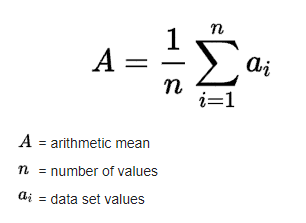

In [5]:
vals = np.array( [23, 25, 26, 45, 45, 55, 22, 31, 72, 32, 99, 31, 45, 55, 72, 36])
vals

array([23, 25, 26, 45, 45, 55, 22, 31, 72, 32, 99, 31, 45, 55, 72, 36])

In [6]:
sum_vals = sum(vals)
sum_vals 

714

In [7]:
num_vals = len(vals)
num_vals

16

In [8]:
x_bar = sum_vals/num_vals
x_bar

44.625

Use the <b>Numpy</b> function <b>mean()</b> and <b>Statistics</b> function <b>mean()</b> 

In [9]:
np.mean(vals)

44.625

In [10]:
# Integer based arithmatic with mean
statistics.mean(vals)

44

In [11]:
# Alwys gives the floating point values
statistics.fmean(vals)

44.625

In [14]:
from scipy import stats 
stats.describe(vals).mean

44.625

In [16]:
result = stats.describe(vals)

In [22]:
[item for item in dir(result) if not item.startswith('_')]

['count',
 'index',
 'kurtosis',
 'mean',
 'minmax',
 'nobs',
 'skewness',
 'variance']

In [23]:
help(result)

Help on DescribeResult in module scipy.stats.stats object:

class DescribeResult(builtins.tuple)
 |  DescribeResult(nobs, minmax, mean, variance, skewness, kurtosis)
 |  
 |  DescribeResult(nobs, minmax, mean, variance, skewness, kurtosis)
 |  
 |  Method resolution order:
 |      DescribeResult
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new dict which maps field names to their values.
 |  
 |  _replace(self, /, **kwds)
 |      Return a new DescribeResult object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(iterable) from builtins.type
 |      Make a new DescribeResult object from a sequence or iterable
 |  
 |  -------

### Median

<p>
<dt>Median</dt>
<dd>The median is the middle value in a set of numbers that has been ranked from smallest to largest. Half the values are smaller than or equal to the median, and half the values are larger than or
equal to the median.The median is not affected by extreme values, so you can use the median
when extreme values are present.</dd>
</p>

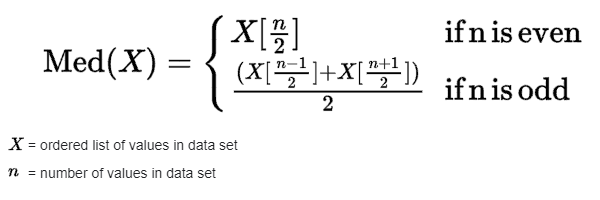

* The <b>median</b> is the middle-ranked value if there is an odd number of values in the data set. If there is an even number of values, then the median is the average of the two middle values.

In [24]:
vals = np.sort(vals)
vals

array([22, 23, 25, 26, 31, 31, 32, 36, 45, 45, 45, 55, 55, 72, 72, 99])

In [28]:
len(vals)//2

8

In [32]:
(vals[8]+vals[9])/2

45.0

Use the <b>Numpy</b> function <b>median()</b> and <b>Statistics</b> function <b>median()</b>

In [30]:
np.median(vals)

40.5

In [31]:
statistics.median(vals)

40.5

### Mode

<p>
<dt>Mode</dt>
<dd>The mode is the value in a set of numbers that appears most frequently.To easily find the mode, put the numbers in order from least to greatest and count how many times each number occurs. There can be no mode or several modes.</dd>
</p>

In [33]:
np.unique(vals,return_counts=True)

(array([22, 23, 25, 26, 31, 32, 36, 45, 55, 72, 99]),
 array([1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1], dtype=int64))

In [34]:
statistics.mode(vals)

45

In [35]:
stats.mode(vals)

ModeResult(mode=array([45]), count=array([3]))

## Variation and Shape of a Data Set

Every dataset can be characterized by its variation and shape or spread and dispersion. 

### Quartiles
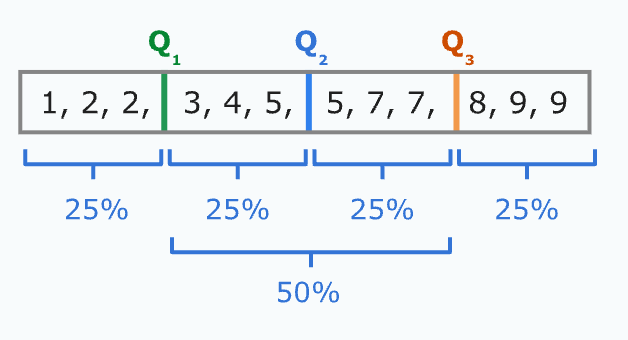

<p>
<dd>A quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size. The data must be ordered from smallest to largest to compute quartiles; as such, quartiles are a form of order statistic. The three main quartiles are as follows:
</dd>
</p>



<p>
<dt>The first quartile (Q1)</dt>
<dd>The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
</dd>
</p>

<p>
<dt>The second quartile (Q2)</dt>
<dd>The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
</dd>
</p>

<p>
<dt>The third quartile (Q3)</dt>
<dd>The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point. 
</dd>
</p>



<b>WARNING: IF THE DESIRED PERCENTILE LIES BETWEEN TWO POINTS</b>
Beware of the interpolation method to use when the desired percentile lies between two data points

#### Numpy

In [37]:
# Interpolation is defaulted to linear

quartiles = np.percentile(vals, [25 ,50, 75])
quartiles

array([29.75, 40.5 , 55.  ])

In [38]:
quartiles = np.percentile(vals, [25 ,50, 75], interpolation = 'linear')
quartiles

array([29.75, 40.5 , 55.  ])

In [49]:
# Interpolation is set to midpoint

quartiles = np.percentile(vals, [25 ,50, 75], interpolation = 'midpoint')
quartiles

array([28.5, 40.5, 55. ])

In [50]:
np.percentile(vals, [25 , 45, 50, 75, 99], interpolation = 'midpoint')

array([28.5, 34. , 40.5, 55. , 85.5])

In [51]:
np.quantile(vals, .25)

29.75

#### Statistics

In [52]:
# Method is defaulted to 'exclusive' (Sample set)
quartiles = statistics.quantiles(vals, n=4)
quartiles 

[27.25, 40.5, 55.0]

In [53]:
# statistics treats method 'inclusive' and the  treated as population data. 
# Therefore the minimum value is treated as the 0th percentile and the
# maximum value is treated as the 100th percentile.

quartiles = statistics.quantiles(vals, n=4, method = 'inclusive')
quartiles 

[29.75, 40.5, 55.0]

#### Scipy

In [54]:
stats.mstats.mquantiles(vals, prob=[0.25, 0.5, 0.75])

array([28.25, 40.5 , 55.  ])

### Range

<p>
<dt>Range</dt>
<dd>The Range is equal to the largest value minus the smallest value.
</dd>
</p>

In [55]:
# Sort vals
vals = np.sort(vals)

# Pick the highest and lowst val
highest = vals[-1]
lowest = vals[0]

# Find the difference

statistical_range = highest-lowest
statistical_range

77

In [58]:
minimum = np.min(vals)
maximum = np.max(vals)
statistical_range = maximum-minimum
statistical_range

77

In [56]:
# Use Numpy's PTP Function 
# The name of the function comes from the acronym for 'peak to peak'.
np.ptp(vals)


77

In [59]:
x = np.array([[4, 9, 2, 10],
...               [6, 9, 7, 12]])

In [60]:
x

array([[ 4,  9,  2, 10],
       [ 6,  9,  7, 12]])

In [62]:
np.ptp(x, axis = 1)

array([8, 6])

In [63]:
np.ptp(x, axis = 0)

array([2, 0, 5, 2])

### Interquartile Range

<p>
<dt>Interquartile Range</dt>
<dd>The Interquartile Range is the difference between the third and first quartiles. 
</dd>
</p>

#### Numpy

In [70]:
quartiles = np.percentile(vals, [25 ,75], interpolation = 'linear')
quartiles

array([29.75, 55.  ])

In [71]:
Q1 = quartiles[0]
Q3 = quartiles[1]
print(quartiles)

IR = Q3 - Q1
IR

[29.75 55.  ]


25.25

In [72]:
quartiles = np.percentile(vals, [25 ,75], interpolation = 'midpoint')

Q1 = quartiles[0]
Q3 = quartiles[1]
print(quartiles)

IR = Q3 - Q1
IR


[28.5 55. ]


26.5

In [73]:
quartiles = np.percentile(vals, [25 ,75], interpolation = 'lower')

Q1 = quartiles[0]
Q3 = quartiles[1]
print(quartiles)

IR = Q3 - Q1
IR

[26 55]


29

In [74]:
quartiles = np.percentile(vals, [25 ,75], interpolation = 'higher')

Q1 = quartiles[0]
Q3 = quartiles[1]
print(quartiles)

IR = Q3 - Q1
IR

[31 55]


24

In [75]:
quartiles = np.percentile(vals, [25 ,75], interpolation = 'nearest')

Q1 = quartiles[0]
Q3 = quartiles[1]
print(quartiles)

IR = Q3 - Q1
IR

[31 55]


24

#### Statistics

In [77]:
quartiles = statistics.quantiles(vals, n=4, method='exclusive')
quartiles 
print(quartiles)

Q1 = quartiles[0]
Q3 = quartiles[2]

IR = Q3 - Q1
IR

[27.25, 40.5, 55.0]


27.75

In [78]:
quartiles = statistics.quantiles(vals, n=4, method='inclusive')
quartiles 
print(quartiles)

Q1 = quartiles[0]
Q3 = quartiles[2]

IR = Q3 - Q1
IR

[29.75, 40.5, 55.0]


25.25

#### Scipy

In [79]:
stats.iqr(vals, interpolation = 'linear')

25.25

In [80]:
stats.iqr(vals, interpolation = 'midpoint')

26.5

In [81]:
stats.iqr(vals, interpolation = 'lower')

29

In [82]:
stats.iqr(vals, interpolation = 'higher')

24

In [83]:
stats.iqr(vals, interpolation = 'nearest')

24

### Statsmodels (Only use if you have to)

In [84]:
from statsmodels.tools.eval_measures import iqr as eval_iqr

In [85]:
eval_iqr(vals, 4, axis = 0)

array(24)

## Slicing in Quantiles

## Descriptive Functions Available in Python
Be careful of the methods they use to formulate descptive stats

#### Statsmodels descriptive stats

In [86]:
from statsmodels.stats.descriptivestats import describe

In [97]:
result = describe(vals).squeeze()
result

nobs                16.000000
missing              0.000000
mean                44.625000
std_err              1.348972
upper_ci            47.268937
lower_ci            41.981063
std                 21.583559
iqr                 25.250000
iqr_normal          18.717853
mad                 16.375000
mad_normal          20.523019
coef_var             0.483665
range               77.000000
max                 99.000000
min                 22.000000
skew                 1.099792
kurtosis             3.518367
jarque_bera          3.404582
jarque_bera_pval     0.182266
mode                45.000000
mode_freq            0.187500
median              40.500000
Name: 0, dtype: float64

In [98]:
result['iqr']

25.25

In [99]:
# Using df.describe from Pandas.
# But notice how we can tell that they are interplating the quartiles using the linear method!

df_vals = pd.DataFrame(vals)
df_vals.describe()

,0
count,16.000000
mean,44.625000
std,21.583559
min,22.000000
25%,29.750000
50%,40.500000
75%,55.000000
max,99.000000


## Generalized, Pythagorian, and "Other" Means

### Percentages May Be Deceptive

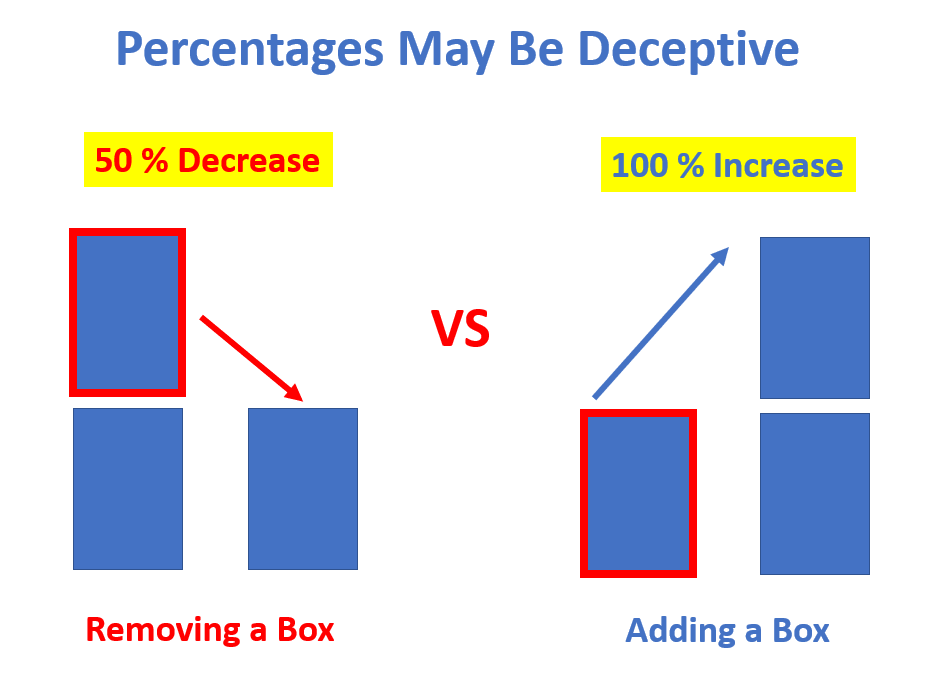

### Geometric Mean
Most often used for rates of return over time. Use for a multiplicative relationship. 

<p>
<dt>Geometric Mean</dt>
<dd>The Geometric Mean measures the rate of change of a variable over time. It does this by taking the nth root of the product of n values. 
</dd>
</p>

<b>Geometric Mean Formula:</b>

$\huge = {(X_1 \cdot X_2 \cdot X_3 ... X_n)}^{1/n}$ <b>n</b> is the number of terms in the formula

$\huge = \sqrt[\leftroot{-2}\uproot{2}n]{(X_1 \cdot X_2 \cdot X_3 ... X_n)}$

Another way to look at it is this way...

$\huge\sqrt[\leftroot{-2}\uproot{2}2]{(2\cdot2)}=2$

or

$\huge\sqrt[\leftroot{-2}\uproot{2}3]{(2\cdot2\cdot2)}=2$

or

$\huge\sqrt[\leftroot{-2}\uproot{2}4]{(2\cdot2\cdot2\cdot2)}=2$

<p>
<dt>Capital Pi</dt>
<dd>The <b>Geometric Mean</b> is <b>ALMOST ALWAYS</b> expressed using this scary-looking thing called a <b>"Capital Pi.</b>" That's funny because it looks like a capital version of the symbol 'Pi'. Don't let these mathematicians and statisticians scare you with their use of obscure Greek letters. It's a lot easier to understand than it looks. Also, using Google Images to look it up will bring you to many Japanese and Chinese characters. It's easier to search for "Capital Pi." Also, everyone loves pie!
</dd>
</p>

The difference between big sum and big pi, is the sum vs the product

$\Huge1\cdot2\cdot3\cdot4 = \prod\limits_{i=1}^4 i$

<b>Geometric Series Formula</b>

$\Huge(\prod\limits_{i=1}^n x_i)^{1/n} = \sqrt[\leftroot{-2}\uproot{2}n]{(X_1 X_2 \cdot \cdot \cdot X_i)}$

Solution in Python found on Stack Overflow here:
https://stackoverflow.com/questions/43099542/python-easy-way-to-do-geometric-mean-in-python

AJ Question

In [107]:
def geo_mean(iterable):
    
    a = np.array(iterable)
    product = np.prod(a)
    return a.prod()**(1.0/len(a))

In [112]:
vals

array([22, 23, 25, 26, 31, 31, 32, 36, 45, 45, 45, 55, 55, 72, 72, 99])

In [115]:
product = np.prod(vals)
product

781418496

In [116]:
product**(1/len(vals))

3.595880332705304

In [108]:
geo_mean(vals)

3.595880332705304

In [109]:
def geo_mean_overflow(iterable):
    a = np.log(iterable)
    return np.exp(a.mean())


In [110]:
geo_mean_overflow(vals)

40.45702352421686

Using <b>Statistics></b>

In [104]:
statistics.geometric_mean(vals)

40.45702352421686

Using <b>Scipy</b>

In [105]:
from scipy.stats.mstats import gmean

In [106]:
gmean(vals)

40.45702352421686

### Geometrice Mean Rate of Return

Since you can't have negative values in the Geometric Mean calculation a simple adjustment is made when calculating rates of return. It measures the average percentage return of an investment over time. 

$ \Large\bar{R}_G = [(1+R_1) \times (1+R_2) \times \cdot\cdot\cdot \times(1 + R_n)]^{1/n}-1$

where $\Large R_n$ is the rate of return in time period $\Large n$

<b>EXAMPLE</b>

Consider the returns going from 2 boxes to 1 box in year one, and then from 1 box to 2 boxes in year 2.

In [117]:
def geo_mean_rate_return(return_vals):
    
    # Add plus one ot each element in the array
    a = np.array(return_vals)+1
    
    # Multiply all the elements in the array together
    product = np.product(a)
    
    # Take the nth root of the resulting product 
    geo_rate_return = product**(1/len(return_vals))

    # Subract 1
    geo_rate_return = geo_rate_return - 1
    
    return geo_rate_return

In [118]:
#2 boxes to 1 box (We lose 1 box)
return_year_1 = (1-2)/2
return_year_1

-0.5

In [119]:
#1 box to 2 boxes (We Gain 1 box)
return_year_2 = (2-1)/1
return_year_2

1.0

In [120]:
return_vals = [return_year_1, return_year_2]
return_vals

[-0.5, 1.0]

In [160]:
return_vals = [-0.5 ,1.0, 1.0, 1.0, 1.0, 1.0]
t = len(return_vals)
k = geo_mean_rate_return(return_vals)
k

0.5874010519681994

In [161]:
100*(1+k)**t

1599.9999999999993

In [121]:
geo_mean_rate_return(return_vals)

0.0

NOTE: Can't use negative values in a geometric mean

In [ ]:
statistics.geometric_mean(return_vals)

### Harmonic Mean
-Avrage Speed, Ratios in Finance, Imbalanced Data, etc.

$\Large H=\Huge(\frac{\sum\limits_{i=1}^n x_i^{1/n}}{n}\Huge)^{-1} $

$\Huge H=\frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\cdot\cdot\cdot+\frac{1}{x_n}}$

Source: Wikipedia: https://en.wikipedia.org/wiki/Harmonic_mean

In many situations involving rates and ratios, the harmonic mean provides the correct average. For instance, if a vehicle travels a certain distance d outbound at a speed x (e.g. 60 km/h) and returns the same distance at a speed y (e.g. 20 km/h), then its average speed is the harmonic mean of x and y (30 km/h) – not the arithmetic mean (40 km/h). The total travel time is the same as if it had traveled the whole distance at that average speed. This can be proven as follows:

Distance (d) is the same both outbound and inbound and equals 1.

$\large \text {Average speed for the entire journey} = \Large\frac{\text {Total distance traveled}}{\text {Sum of time for each segment}} = \frac{2d}{\frac{d}{x_1}+\frac{d}{X_2}} = \frac{2}{\frac{1}{x_1}+\frac{1}{x_2}}=\frac{n}{\frac{1}{x_1}+\frac{1}{x_2}}$

However we normally have different weights in the real world we have to apply to things, and the unweighted harmonic mean can be regarded as the special case where all of the weights are equal.

### Weighted Harmonic Mean

The weighted harmonic mean is the preferable method for averaging multiples, such as the price–earnings ratio (P/E). If these ratios are averaged using a weighted arithmetic mean, high data points are given greater weights than low data points. The weighted harmonic mean, on the other hand, correctly weights each data point. The simple weighted arithmetic mean when applied to non-price normalized ratios such as the P/E is biased upwards and cannot be numerically justified, since it is based on equalized earnings; just as vehicles speeds cannot be averaged for a roundtrip journey.

$\Huge H = \frac{\sum \limits_{i=1}^n w_i} {\sum \limits_{i=1}^n \frac{w_i}{x_i}}$

$\Huge H = \frac{(w_1+w_2)}{(\frac{w_1}{x_1})+(\frac{w_1}{x_2})}$

<b>EXAMPLE</b>

For example, consider two firms:
- Firm 1 with a market capitalization of $\$150$ billion and earnings of $\$5$ billion (P/E of 30)
- Firm 2 with a market capitalization of $\$1$ billion and earnings of $\$1$ million (P/E of 1000)

Consider an index made of the two stocks, with 30% invested in Firm 1 and 70% invested in Firm 2. We want to calculate the P/E ratio of this index.

$\large\text Price to Earnings Ratio (P/E) of Firm 1 = \Large\frac{150,000,000,000}{5,000,000,000} = 30$

$\large\text Price to Earnings Ratio (P/E) of Firm 2 = \Large\frac{1,000,000,000}{1,000,000} = 1000$

<b>INCORRECT:</b> 
Using the weighted arithmetic mean (incorrect):

$\Large{\displaystyle P/E=0.3\times 30+0.7\times 1000=709}$

<b>CORRECT:</b> Weighted Harmonic Mean

$\Large{\displaystyle P/E={\frac {0.3+0.7}{0.3/30+0.7/1000}}\approx 93.46}$